# <center><font color=black> NFL Data Science </font></center>
### <center> David Armah Jr. </center>

Summary: 

In [1]:
#Necessary Imports
import requests
from bs4 import BeautifulSoup
import pandas as pd
import html5lib
import unittest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import xgboost
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
pd.options.display.float_format ='{:.2f}'.format


### Section 1: Data Collection and Processing

In this Section I will be webscraping data from FootballDB.com for various Player and Team Statistics

About Data Source:

In [2]:
## Configure and Collect Data
## Retrieve Data from given url
# Return data in a pandas DataFrame
def configure(url):
    
    
    ## Create header to access Webpage
    hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}
    
    try:
        #Retrieve Webpage Table
        data = requests.get(url, headers=hdr)
        soup = BeautifulSoup(data.text, 'html.parser')
        table = soup.find_all('table')
        df = pd.read_html(str(table))[0]
        print('Successfully retrieved table from ' + url)
        return df
    except Exception as error:
        #Throw Error
        print('Unsuccesful Retrieval: Error trying to retrieve table from given Url', error)
        



## Section 1: Test 

In [3]:
# Test the Section 1 Method with various cases
def testConfigure(url):
    examDF = configure(url)
    assert examDF is not None

# Good Link Test
testConfigure('https://www.footballdb.com/statistics/nfl/player-stats/passing/2022/regular-season?sort=passrate&limit=all')
#rushing)
# Bad Link Test
#testConfigure('https://www.footbaldb.com/statistics/nfl/player-stats/passing/2022/regular-season?sort=passrate&limit=all')
   

Successfully retrieved table from https://www.footballdb.com/statistics/nfl/player-stats/passing/2022/regular-season?sort=passrate&limit=all


## Section 2: Initial Data Cleaning

In this Section I will be cleaning the Player Name/ Team Name columns

In [4]:
## Removes unnecessary characters from Player names and Fixes abnormal Column names
def cleanPlayerName(df):
    try:
        for i in df['Player']:
            player = i
            #print(player)

            L = False
            R = 0

            while R < len(player):

                if player[R] == ' ' and L == False:
                    L = True
                elif player[R] == '.' and L == True:
                    df['Player'] = df['Player'].replace(player, player[:R])
                    break
                R += 1
        df['Player'] = df['Player'].str[:-1]
        
        #df.index = df['Player']
    except:
        print('Error trying to clean player names')

#Removes unnecessary characters from Team names
def cleanTeamName(df):
    try:
        for i in df['Team']:
            team = i

            L = False
            R =0

            while R < len(team):
                if (team[R].isupper() or team[R].isdigit()) and L == False:
                    L = True    
                elif team[R].isupper() and L == True:
                    df['Team']= df['Team'].replace(team, team[:R])
                    break    
                elif team[R] == " ":
                    L = False
                R += 1  
    except:
        print('Error trying to clean team names')

## Section 2: Test

In [5]:
def testPlayerNamePassing(df):
    examQbs = ['Derek Carr', 'Joe Burrow', 'Patrick Mahomes', 'Kirk Cousins']
    cleanPlayerName(df)
    assert df['Player'].isin(examQbs).values.sum() == len(examQbs)
def testPlayerNameRushing(df):
    examRbs = ['Dalvin Cook', 'Derrick Henry', 'Clyde Edwards-Helaire', 'Alvin Kamara']
    cleanPlayerName(df)
    assert df['Player'].isin(examRbs).values.sum() == len(examRbs)
def testPlayerNameReceiving(df):
    examWrs = ['A.J. Brown', 'Justin Jefferson', 'Amari Cooper']
    cleanPlayerName(df)
    assert df['Player'].isin(examWrs).values.sum() == len(examWrs)

#testPlayerNamePassing(configure(passing_stats))
#testPlayerNameRushing(configure(rushing_stats))
#testPlayerNameReceiving(configure(receiving_stats))

In [6]:
#passing table URL
passing_stats = 'https://www.footballdb.com/statistics/nfl/player-stats/passing/2022/regular-season?sort=passrate&limit=all'
#rushing table URL
rushing_stats = 'https://www.footballdb.com/statistics/nfl/player-stats/rushing/2022/regular-season?sort=rushyds&limit=all'
#receiving table URL
receiving_stats = 'https://www.footballdb.com/statistics/nfl/player-stats/receiving/2022/regular-season?sort=recnum&limit=all'
#team offense URL
offensive_stats = 'https://www.footballdb.com/stats/teamstat.html?lg=NFL&yr=2022&type=reg&cat=T&group=O&conf='
#team defense URL
defensive_stats = 'https://www.footballdb.com/stats/teamstat.html?lg=NFL&yr=2022&type=reg&cat=T&group=D&conf='
#play selection data URL for year 2022 Testing
plays_stats = 'https://www.footballdb.com/stats/play-selection.html' 

## Section 3: Secondary Data Cleaning

In [7]:
def cleanPlayerData(df):
    df['Lg'] = df['Lg'].str.replace('[A-Za-z]', '', regex=True)
    df['Lg']=df['Lg'].astype('float64')
def cleanTeamData(df):
    df.columns = df.columns.str.replace(u'\xa0', '_')


## Section 3: Test

In [8]:
# Player data
dfPass = configure(passing_stats)
cleanPlayerName(dfPass)
cleanPlayerData(dfPass)
dfRush = configure(rushing_stats)
cleanPlayerName(dfRush)
cleanPlayerData(dfRush)
dfReceive = configure(receiving_stats)
cleanPlayerName(dfReceive)
cleanPlayerData(dfReceive)

# Team data
dfOffense = configure(offensive_stats)
cleanTeamName(dfOffense)
cleanTeamData(dfOffense)
dfDefense = configure(defensive_stats)
cleanTeamName(dfDefense)
cleanTeamData(dfDefense)
dfPlays = configure(plays_stats)
cleanTeamName(dfPlays)
cleanTeamData(dfPlays)

Successfully retrieved table from https://www.footballdb.com/statistics/nfl/player-stats/passing/2022/regular-season?sort=passrate&limit=all
Successfully retrieved table from https://www.footballdb.com/statistics/nfl/player-stats/rushing/2022/regular-season?sort=rushyds&limit=all
Successfully retrieved table from https://www.footballdb.com/statistics/nfl/player-stats/receiving/2022/regular-season?sort=recnum&limit=all
Successfully retrieved table from https://www.footballdb.com/stats/teamstat.html?lg=NFL&yr=2022&type=reg&cat=T&group=O&conf=
Successfully retrieved table from https://www.footballdb.com/stats/teamstat.html?lg=NFL&yr=2022&type=reg&cat=T&group=D&conf=
Successfully retrieved table from https://www.footballdb.com/stats/play-selection.html


In [9]:
dfReceive

,Player,Team,Gms,Rec,Yds,Avg,YPG,Lg,TD,FD,Tar,YAC
0,Justin Jefferson,MIN,17,128,1809,14.13,106.40,64.00,8,80,184,613
1,Tyreek Hill,MIA,17,119,1710,14.37,100.60,64.00,7,77,170,482
2,Travis Kelce,KC,17,110,1338,12.16,78.70,52.00,12,78,152,648
3,Stefon Diggs,BUF,16,108,1429,13.23,89.30,53.00,11,72,154,419
4,Austin Ekeler,LAC,17,107,722,6.75,42.50,23.00,5,36,127,857
...,...,...,...,...,...,...,...,...,...,...,...,...
506,Jake Tonges,CHI,4,0,0,0.00,0.00,0.00,0,0,1,0
507,Laremy Tunsil,HOU,17,0,0,0.00,0.00,0.00,0,0,0,0
508,D.J. Turner,LV,9,0,0,0.00,0.00,0.00,0,0,1,0
509,James Washington,DAL,2,0,0,0.00,0.00,0.00,0,0,1,0


## Section 4: Filter Columns

In [10]:
# Player Data
filteredPass = dfPass[['Player', 'Team', 'Gms', 'Att','Cmp', 'Yds', 'TD', 'Int', 'Sack', 'Loss']]
filteredRush = dfRush[['Player', 'Team', 'Gms', 'Att', 'Yds', 'TD', 'FD']]
filteredReceive = dfReceive[['Player', 'Team', 'Gms', 'Rec', 'Yds', 'TD', 'FD', 'Tar', 'YAC']]
filteredOffense = dfOffense[['Team','Gms', 'Tot_Pts', 'RushYds', 'PassYds', 'TotYds']]
filteredDefense = dfDefense[['Team','Gms', 'Tot_Pts', 'RushYds', 'PassYds', 'TotYds']]
filteredPlays = dfPlays[['Team', 'Gms', 'Plays', 'Rush', 'Pass']]

## Section 5: Build Average Per Game Data

In [11]:
def getAvg(passing, rushing, receiving, teamOffense, teamDefense, plays):
    passing[['Att', 
                  'Cmp', 'Yds', 'TD', 'Int', 'Sack', 'Loss']] = passing[[ 'Att', 
                                                                        'Cmp', 'Yds', 'TD', 'Int', 'Sack', 'Loss']].div(passing['Gms'].values,axis=0)
    rushing[['Att', 'Yds', 'TD', 'FD']] = rushing[['Att', 'Yds', 'TD', 'FD']] \
    .div(rushing['Gms'].values, axis=0)
    
    receiving[['Tar','Rec', 'Yds', 'YAC', 'FD', 'TD']] = receiving[['Tar','Rec', 'Yds', 'YAC', 'FD', 'TD']] \
    .div(receiving['Gms'].values, axis = 0)
    
    teamOffense[['PassYds', 'RushYds','TotYds', 'Tot_Pts']] =  teamOffense[['PassYds', 'RushYds',
                                                                            'TotYds', 'Tot_Pts']].div(teamOffense['Gms'].values, axis=0)
    
    teamDefense[['PassYds', 'RushYds','TotYds', 'Tot_Pts']] =  teamDefense[['PassYds', 'RushYds',
                                                                            'TotYds', 'Tot_Pts']].div(teamDefense['Gms'].values, axis=0)
    
    plays[['Rush', 'Pass']] = plays[['Rush', 'Pass']].div(plays['Plays'].values, axis=0)
    
    plays[['Plays']] = plays[['Plays']].div(plays['Gms'].values, axis=0)
    
    
    
    return passing, rushing, receiving, teamOffense, teamDefense, plays


    
    

In [12]:
avgPass, avgRush, avgReceive, \
avgTeamO, avgTeamD, avgTeamPlays = getAvg(filteredPass.copy(), filteredRush.copy(), filteredReceive.copy(), \
                                                                        filteredOffense.copy(), filteredDefense.copy(), filteredPlays.copy())





## Section 6: Build Team League Average Series

In [13]:
def leagAvg(avgO, avgD, avgP):
    return avgO[['Tot_Pts', 'RushYds', 'PassYds', 'TotYds']].mean(), \
            avgD[['Tot_Pts', 'RushYds', 'PassYds', 'TotYds']].mean(), avgP[['Plays', 'Rush', 'Pass']].mean()

In [14]:
leagO, leagD, leagP = leagAvg(avgTeamO.copy(), avgTeamD.copy(), avgTeamPlays.copy())

## Section 7: Build Team League Differences/Ratio Dataframe

In [15]:
def avgLeagDiff(avgO, leagO, avgD, leagD, avgP, leagP):
    avgO[['Tot_Pts', 'RushYds', 'PassYds', 'TotYds']] = avgO[['Tot_Pts', 'RushYds', 'PassYds', 'TotYds']] - leagO
    avgD[['Tot_Pts', 'RushYds', 'PassYds', 'TotYds']] = avgD[['Tot_Pts', 'RushYds', 'PassYds', 'TotYds']] - leagD
    avgP[['Plays', 'Rush', 'Pass']] = avgP[['Plays', 'Rush', 'Pass']] - leagP
    return avgO, avgD, avgP

def avgLeagRatio(avgO, leagO, avgD, leagD, avgP, leagP):
    avgO[['Tot_Pts', 'RushYds', 'PassYds', 'TotYds']] = avgO[['Tot_Pts', 'RushYds', 'PassYds', 'TotYds']].div(leagO)
    avgD[['Tot_Pts', 'RushYds', 'PassYds', 'TotYds']] = avgD[['Tot_Pts', 'RushYds', 'PassYds', 'TotYds']].div(leagD)
    avgP[['Plays', 'Rush', 'Pass']] = avgP[['Plays', 'Rush', 'Pass']].div(leagP)
    return avgO, avgD, avgP
    
    
    

In [16]:
avgDiffTeamO,avgDiffTeamD, avgDiffTeamP = avgLeagDiff(avgTeamO.copy(),leagO.copy(), \
                                                      avgTeamD.copy(), leagD.copy(), avgTeamPlays.copy(), leagP.copy())
avgRatioTeamO,avgRatioTeamD, avgRatioTeamP = avgLeagRatio(avgTeamO.copy(),leagO.copy(),\
                                                          avgTeamD.copy(), leagD.copy(), avgTeamPlays.copy(), leagP.copy())


## Section 8: Initial Dive into Feature Relationships 

#### Player Data

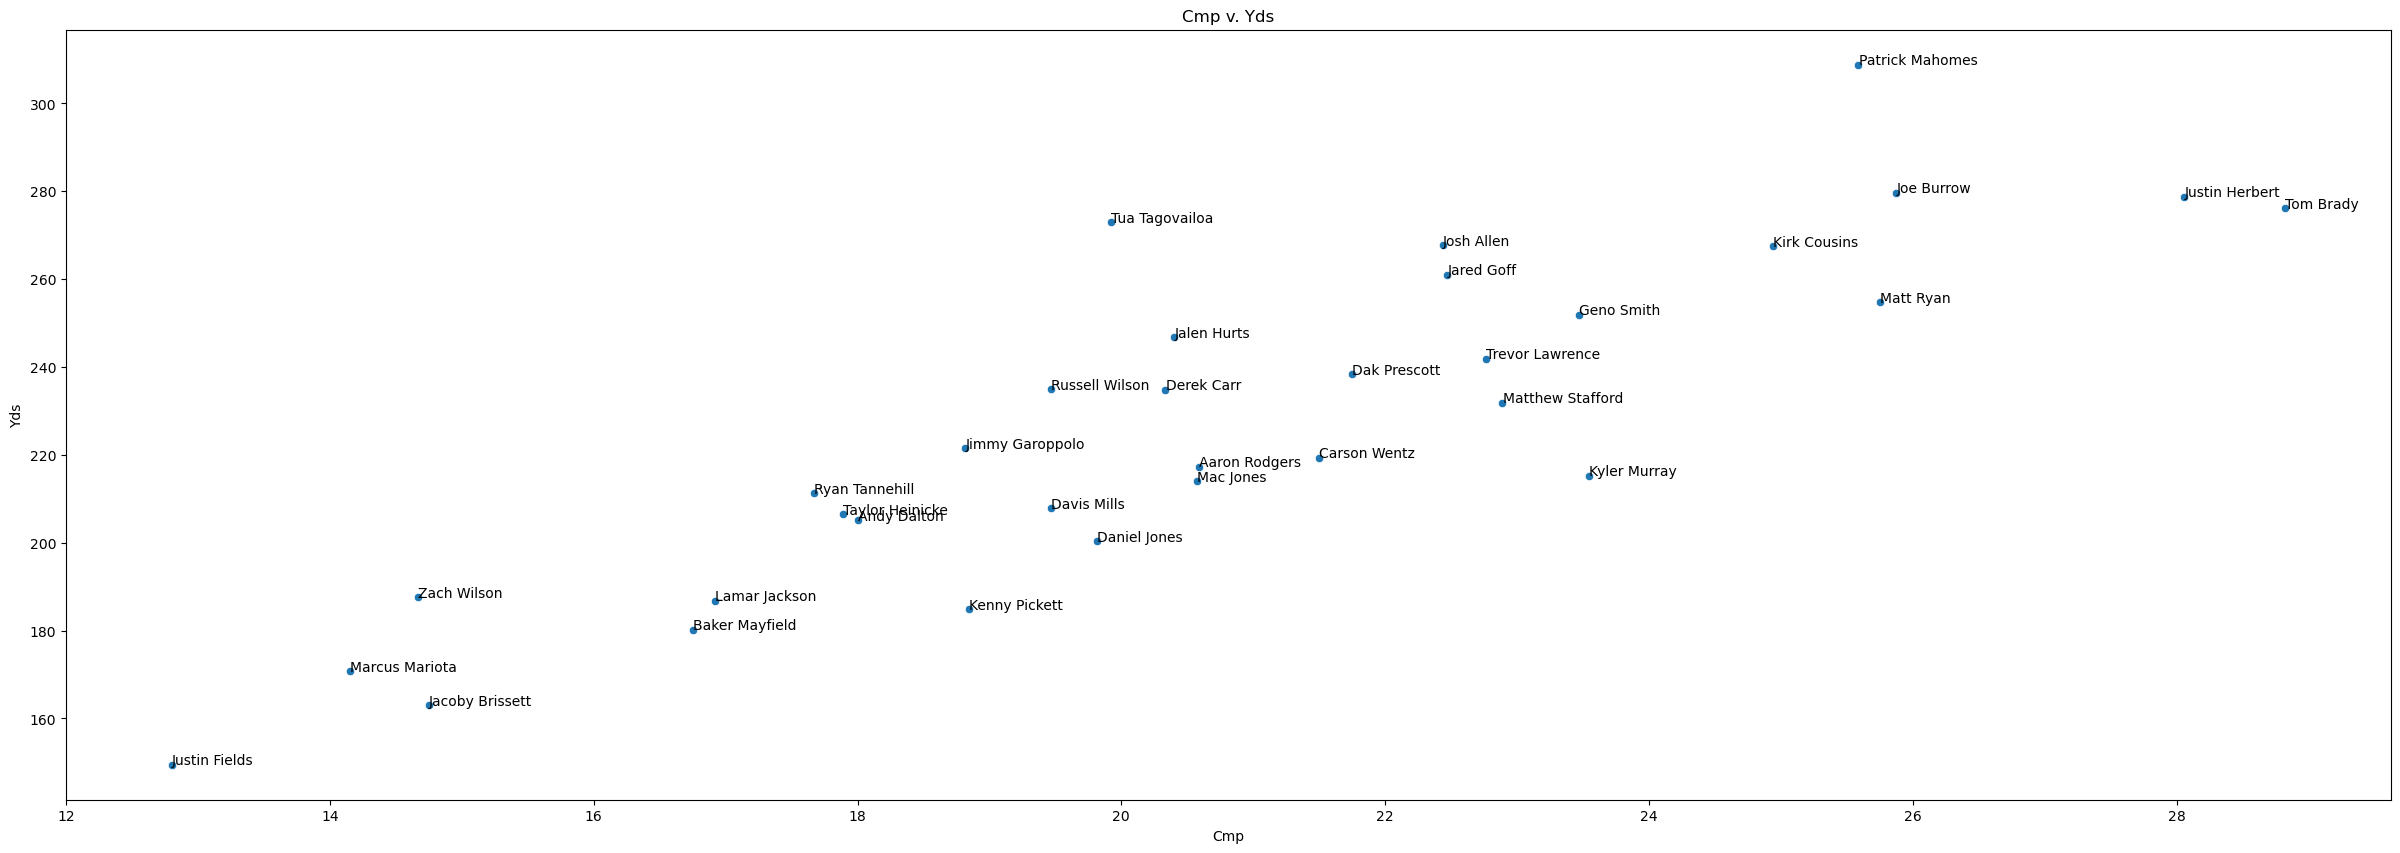

In [17]:
# View Relationships between variables
%matplotlib inline

def playerPlot(df, x1, y1): 
    
    def plotlabel(xvar, yvar, label):
        ax.text(xvar+0.002, yvar, label)
        
    fig = plt.figure(figsize=(30,10))
    ax = sns.scatterplot(x = x1, y =  y1, data=df)

    # The magic starts here:
    df.apply(lambda x: plotlabel(x[x1],  x[y1], x['Player']), axis=1)

    plt.title(x1 + ' v. ' + y1)
    plt.xlabel(x1)
    plt.ylabel(y1)
    
playerPlot(avgPass, 'Cmp', 'Yds')

/var/folders/zd/57mrs6w954s14yycnjh8ngy40000gn/T/ipykernel_19280/2235594616.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(avgPass.corr(), annot=True)


<Axes: >

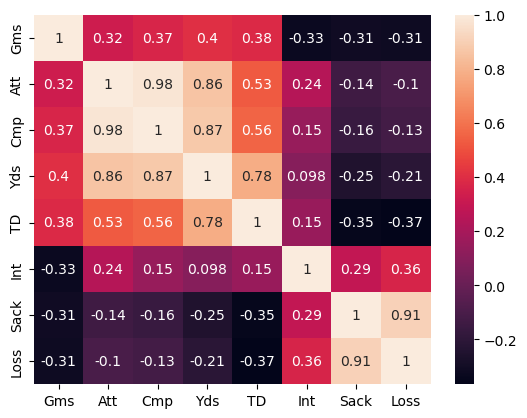

In [18]:
sns.heatmap(avgPass.corr(), annot=True)

/var/folders/zd/57mrs6w954s14yycnjh8ngy40000gn/T/ipykernel_19280/1905145301.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(avgRush.corr(), annot=True)


<Axes: >

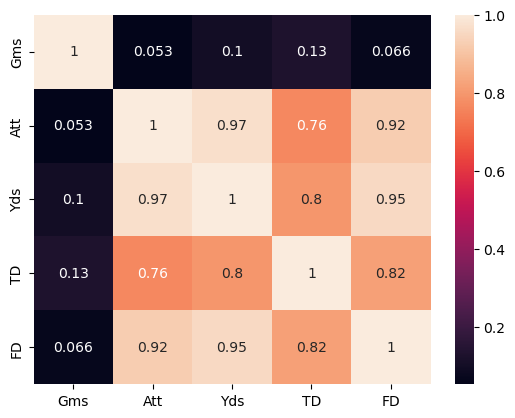

In [19]:
sns.heatmap(avgRush.corr(), annot=True)

/var/folders/zd/57mrs6w954s14yycnjh8ngy40000gn/T/ipykernel_19280/1409764328.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(avgReceive.corr(), annot=True)


<Axes: >

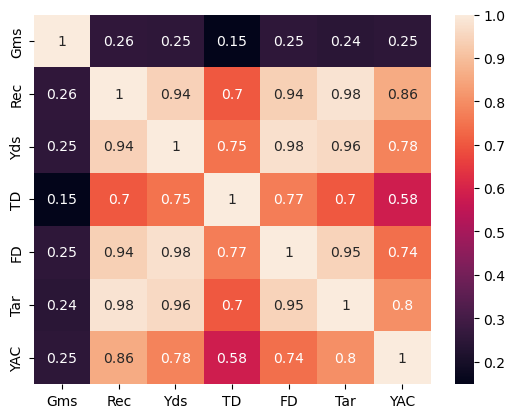

In [20]:
sns.heatmap(avgReceive.corr(), annot=True)

/var/folders/zd/57mrs6w954s14yycnjh8ngy40000gn/T/ipykernel_19280/2941758914.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(avgRatioTeamO.corr(), annot=True)


<Axes: >

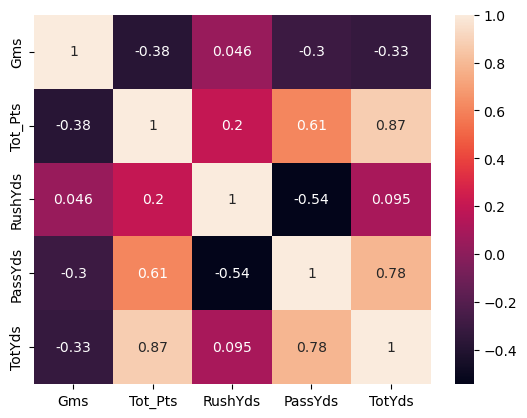

In [21]:
sns.heatmap(avgRatioTeamO.corr(), annot=True)

## Section 9: Rename Column Names

In [22]:
# Passing
passing_cols = ['Player', 'Team', 'Gms', 'Passing_Att', 'Passing_Cmp', 'Passing_Yds', 'Passing_TD', 'Passing_Int',
                   'Sack','SackYds_Loss']
rushing_cols = ['Player', 'Team', 'Gms', 'Rushing_Att', 'Rushing_Yds', 'Rushing_TD', 'Rushing_FD']

receiving_cols = ['Player', 'Team', 'Gms', 'Receiving_Rec', 'Receiving_Yds', 'Receiving_TD', 'Receiving_FD',
                   'Receiving_Tar','Receiving_YAC']

filteredPass.columns = passing_cols
filteredRush.columns = rushing_cols
filteredReceive.columns = receiving_cols

avgPass.columns = passing_cols
avgRush.columns = rushing_cols
avgReceive.columns = receiving_cols


## Section 10: Combine Player Data

In [23]:
fullPlayerDF = filteredPass.set_index('Player') \
                .combine_first(filteredRush.set_index('Player')) \
                .combine_first(filteredReceive.set_index('Player'))

fullPlayerAvgsDF = avgPass.set_index('Player') \
                .combine_first(avgRush.set_index('Player')) \
                .combine_first(avgReceive.set_index('Player'))

In [24]:
columnOrder = ['Team', 'Gms', 'Passing_Att','Passing_Cmp', 'Passing_Yds', 'Passing_TD', 
           'Passing_Int','Sack', 'SackYds_Loss','Rushing_Att', 'Rushing_Yds', 
           'Rushing_TD', 'Rushing_FD', 'Receiving_Tar', 'Receiving_Rec',
            'Receiving_Yds','Receiving_TD','Receiving_FD','Receiving_YAC'   ]

In [25]:
fullPlayerDF

,Gms,Passing_Att,Passing_Cmp,Passing_Int,Passing_TD,Passing_Yds,Receiving_FD,Receiving_Rec,Receiving_TD,Receiving_Tar,Receiving_YAC,Receiving_Yds,Rushing_Att,Rushing_FD,Rushing_TD,Rushing_Yds,Sack,SackYds_Loss,Team
Player,,,,,,,,,,,,,,,,,,,
A.J. Brown,17,NaN,NaN,NaN,NaN,NaN,59.00,88.00,11.00,145.00,548.00,1496.00,NaN,NaN,NaN,NaN,NaN,NaN,PHI
A.J. Green,15,NaN,NaN,NaN,NaN,NaN,11.00,24.00,2.00,47.00,56.00,236.00,NaN,NaN,NaN,NaN,NaN,NaN,ARI
AJ Dillon,17,NaN,NaN,NaN,NaN,NaN,9.00,28.00,0.00,43.00,197.00,206.00,186.00,47.00,7.00,770.00,NaN,NaN,GB
Aaron Jones,17,NaN,NaN,NaN,NaN,NaN,19.00,59.00,5.00,72.00,447.00,395.00,213.00,54.00,2.00,1121.00,NaN,NaN,GB
Aaron Rodgers,17,542.00,350.00,12.00,26.00,3695.00,NaN,NaN,NaN,NaN,NaN,NaN,34.00,9.00,1.00,94.00,32.00,258.00,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Wilson,9,242.00,132.00,7.00,6.00,1688.00,1.00,1.00,1.00,1.00,0.00,2.00,28.00,7.00,1.00,102.00,23.00,175.00,NYJ
Zack Moss,13,NaN,NaN,NaN,NaN,NaN,2.00,11.00,0.00,13.00,42.00,39.00,93.00,18.00,1.00,456.00,NaN,NaN,BUF/IND
Zamir White,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.00,4.00,0.00,70.00,NaN,NaN,LV


In [26]:
fullPlayerDF = fullPlayerDF[columnOrder]
fullPlayerAvgsDF = fullPlayerAvgsDF[columnOrder]

In [27]:
fullPlayerDF.iloc[:, : 2].isna().sum()

Team    0
Gms     0
dtype: int64

In [28]:
fullPlayerAvgsDF.iloc[:, : 2].isna().sum()

Team    0
Gms     0
dtype: int64

In [29]:
fullPlayerDF =fullPlayerDF.fillna(0)

In [30]:
fullPlayerAvgsDF =fullPlayerAvgsDF.fillna(0)

## Section 11: Feature Selection

/var/folders/zd/57mrs6w954s14yycnjh8ngy40000gn/T/ipykernel_19280/1116800858.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fullPlayerDF.corr(), annot=True)


<Axes: >

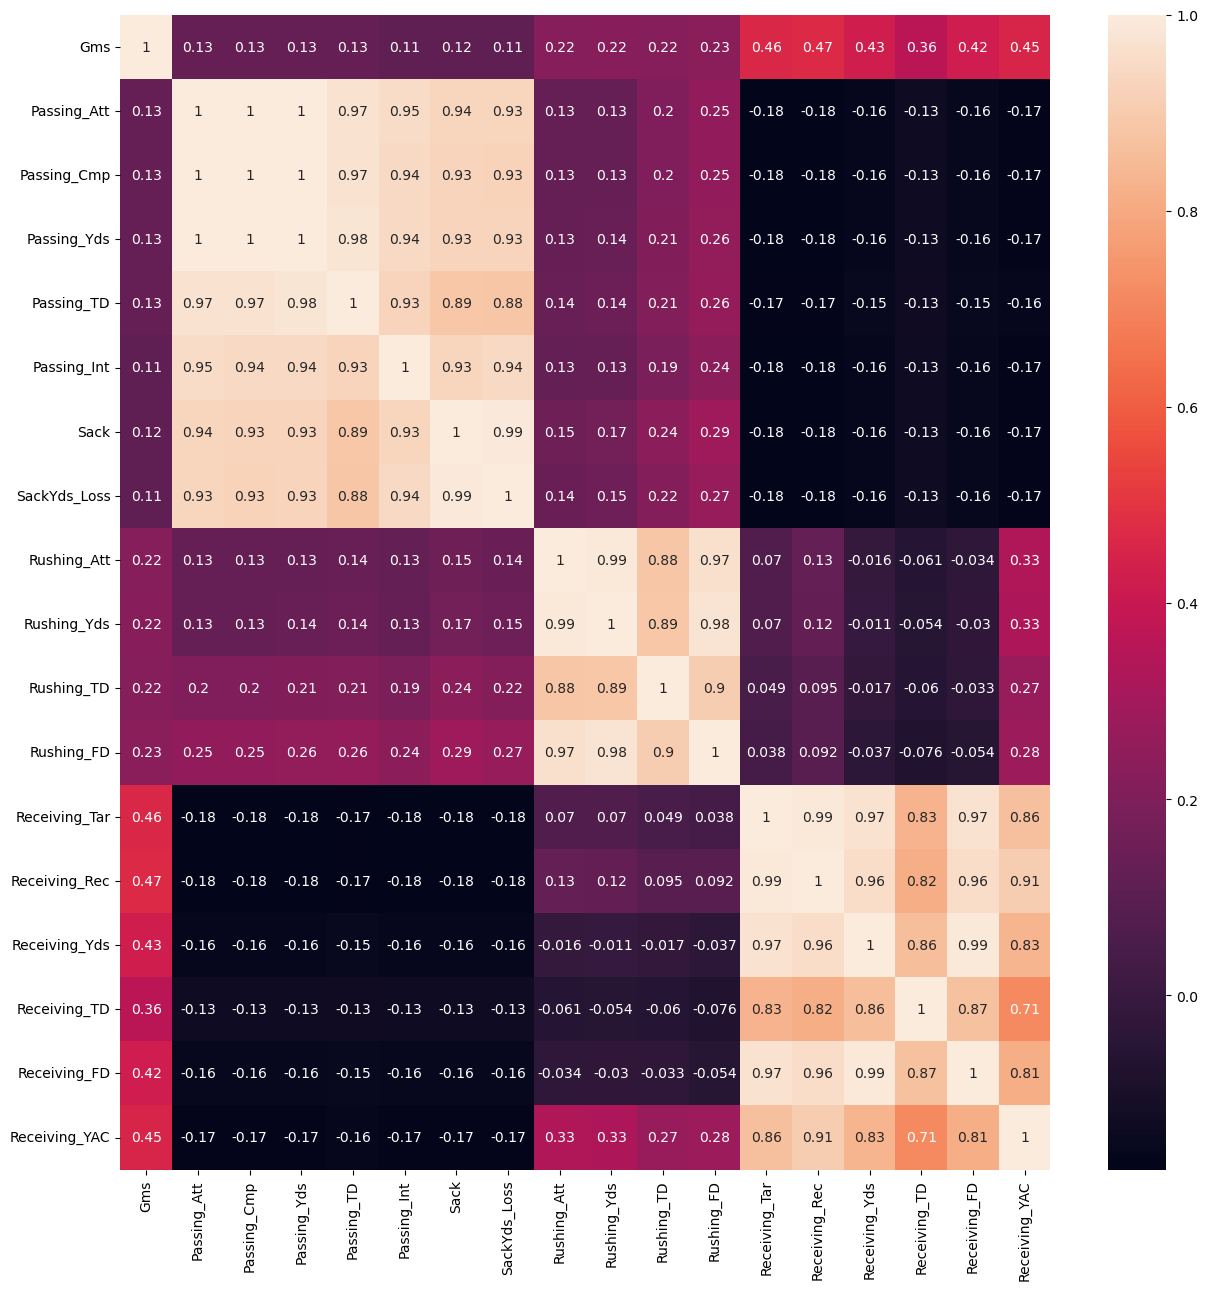

In [31]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(fullPlayerDF.corr(), annot=True)

/var/folders/zd/57mrs6w954s14yycnjh8ngy40000gn/T/ipykernel_19280/230628868.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fullPlayerAvgsDF.corr(), annot=True)


<Axes: >

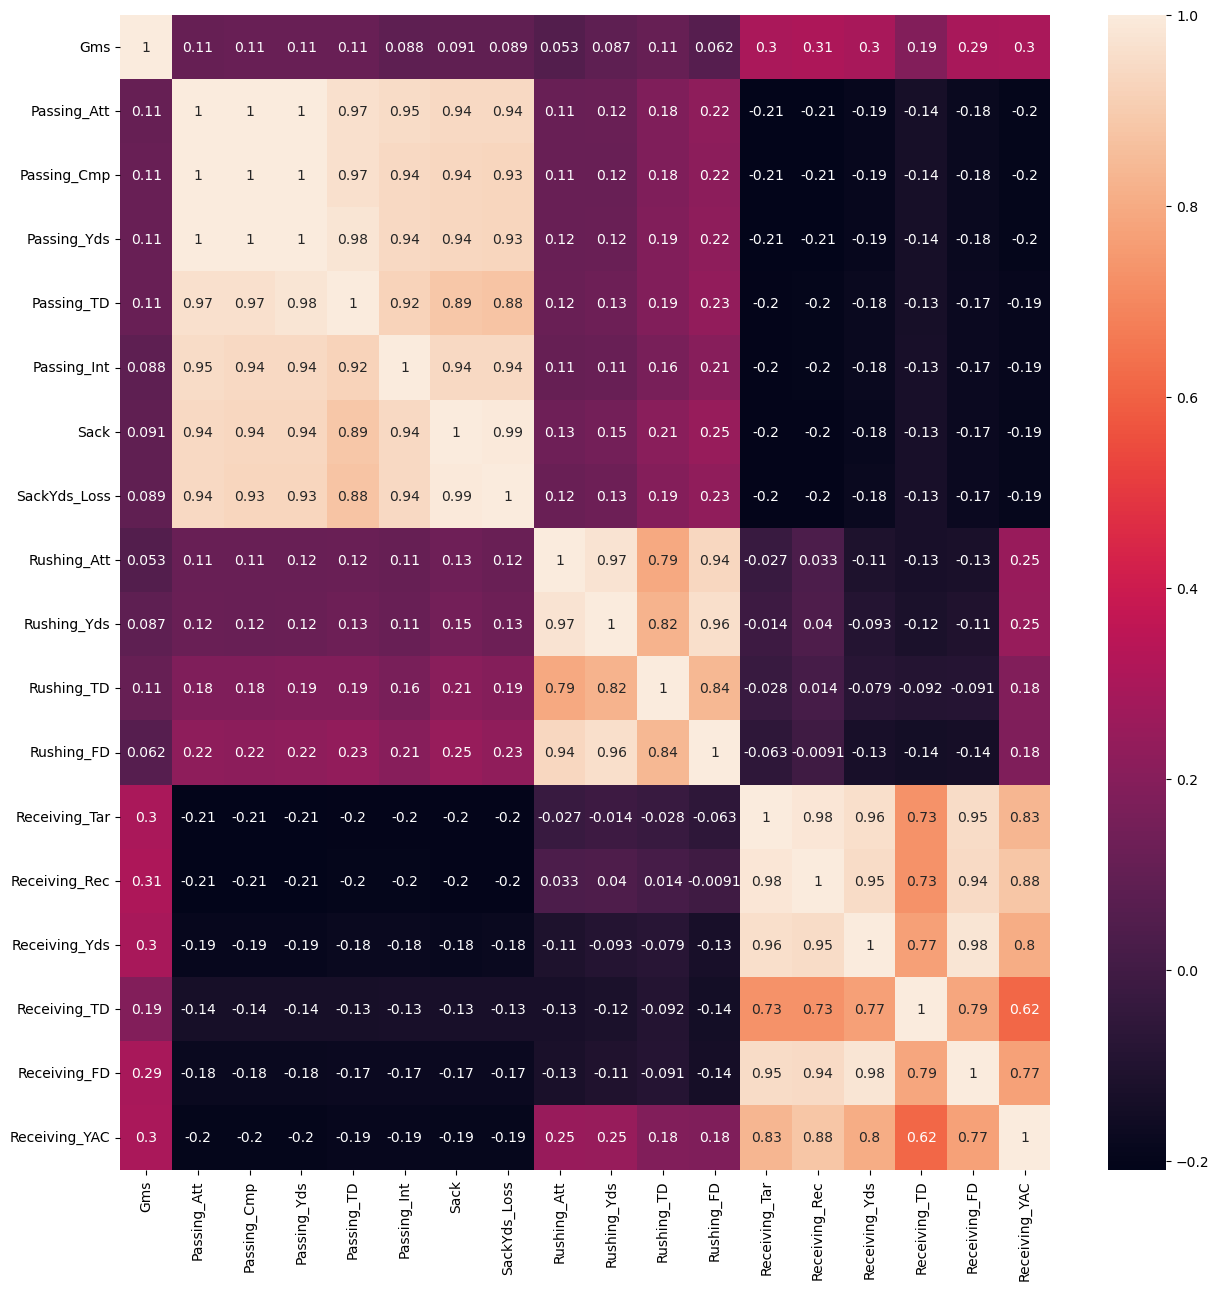

In [32]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(fullPlayerAvgsDF.corr(), annot=True)

## Section 11: Linear Regression

Summary:


Limitations:

In [33]:
def LR_PG(X,Y, PlayerPerGame):
    X_train, X_test, y_train, y_test = train_test_split(PlayerPerGame[X], 
                                                        PlayerPerGame[Y])
    #Create Linear model
    LR = LinearRegression()
    LR.fit(X_train.values.reshape(-1,1), y_train.values)
    
    
    def modelPerformance(lr, X_train, y_train):
        y_pred_train = lr.predict(X_train.values.reshape(-1,1))
        return r2_score(y_train, y_pred_train)
    
    #print(modelPerformance(LR, X_train, y_train))

    
    
    prediction = LR.predict(X_test.values.reshape(-1,1))
    #print("Mean squared error of Linear Regression: %.2f" % mean_squared_error(y_test, prediction))
    return LR
    
def LR_Predict(LR, value):
    x= LR.predict(np.array([[value]]))[0]
    return x
    
def run_LR(playerAvg):
    linearReg = pd.DataFrame()
    
    linearReg.index = playerAvg.index
    
    linearReg['LR_Passing_Att']= [LR_Predict( \
        LR_PG('Passing_Cmp', 'Passing_Att', playerAvg), i)for i in playerAvg['Passing_Cmp']]
                                  
    linearReg['LR_Passing_Cmp'] = [LR_Predict( \
        LR_PG('Passing_Att', 'Passing_Cmp', playerAvg), i)for i in playerAvg['Passing_Att']]  
                                  
    linearReg['LR_Passing_Yds']= [LR_Predict( \
        LR_PG('Passing_Cmp', 'Passing_Yds', playerAvg), i)for i in playerAvg['Passing_Cmp']]
                                  
    linearReg['LR_Passing_TD']= [LR_Predict( \
        LR_PG('Passing_Yds', 'Passing_TD', playerAvg), i)for i in playerAvg['Passing_Yds']]
    
    linearReg['LR_Passing_Int']= [LR_Predict( \
        LR_PG('Passing_Att', 'Passing_Int', playerAvg), i)for i in playerAvg['Passing_Att']]
                                  
                                  
    linearReg['LR_Rushing_Att']= [LR_Predict(
        LR_PG('Rushing_Yds', 'Rushing_Att', playerAvg), i)for i in playerAvg['Rushing_Yds']]
                                  
    linearReg['LR_Rushing_Yds']= [LR_Predict(
        LR_PG(['Rushing_Att'], 'Rushing_Yds',playerAvg), i)for i in playerAvg['Rushing_Att']]
                                  
    linearReg['LR_Rushing_TD']= [LR_Predict(
        LR_PG('Rushing_FD', 'Rushing_TD',playerAvg), i)for i in playerAvg['Rushing_FD']]
                                  
    linearReg['LR_Receiving_Tar']= [LR_Predict(
        LR_PG('Receiving_Rec', 'Receiving_Tar', playerAvg), i)for i in playerAvg['Receiving_Rec']]
    
    linearReg['LR_Receiving_Rec']= [LR_Predict(
        LR_PG('Receiving_Tar', 'Receiving_Rec', playerAvg), i)for i in playerAvg['Receiving_Tar']]
                                  
    linearReg['LR_Receiving_Yds']= [LR_Predict(
        LR_PG('Receiving_Rec', 'Receiving_Yds', playerAvg), i)for i in playerAvg['Receiving_Rec']]
                                  
    linearReg['LR_Receiving_TD']= [LR_Predict(
        LR_PG('Receiving_FD', 'Receiving_TD', playerAvg), i)for i in playerAvg['Receiving_FD']]

    return pd.concat([playerAvg, linearReg], axis=1)





def monteCarlo_LinearReg(df):
    list1 = []
    for i in range(0,100):
        linearRegTable = run_LR(fullPlayerAvgsDF)
        list1.append(linearRegTable)
    result = pd.concat(list1)
    return result.groupby(level=0).mean()

In [34]:
linearRegDF = monteCarlo_LinearReg(fullPlayerAvgsDF)

/var/folders/zd/57mrs6w954s14yycnjh8ngy40000gn/T/ipykernel_19280/140694834.py:79: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return result.groupby(level=0).mean()


## Section 12: Multiple Linear Regression

In [35]:
def MLR_PG(X,Y, PlayerPerGame):
    X_train, X_test, y_train, y_test = train_test_split(PlayerPerGame[X].to_numpy(), 
                                                        PlayerPerGame[Y])
    #Create Linear model
    MLR = LinearRegression()
    MLR.fit(X_train, y_train.values)
    
    
    def modelPerformance(mlr, X_train, y_train):
        y_pred_train = mlr.predict(X_train)
        return r2_score(y_train, y_pred_train)
    
    #print(modelPerformance(MLR, X_train, y_train))

    
    
    prediction = MLR.predict(PlayerPerGame[X].values)
    #print("Mean squared error of Linear Regression: %.2f" % mean_squared_error(y_test, prediction))
    return prediction

def run_MLR(playerAvg):
    mullinearReg = pd.DataFrame()
    
    mullinearReg.index = playerAvg.index
    
    mullinearReg['MLR_Passing_Att']= MLR_PG(['Passing_Cmp', 'Passing_Yds', 'Passing_TD', \
                                             'Passing_Int','Sack', 'SackYds_Loss'], 'Passing_Att', playerAvg)
                                  
    mullinearReg['MLR_Passing_Cmp'] = MLR_PG(['Passing_Att', 'Passing_Yds', 'Passing_TD', \
                                              'Passing_Int','Sack', 'SackYds_Loss'], 'Passing_Cmp', playerAvg)
                                  
    mullinearReg['MLR_Passing_Yds']= MLR_PG(['Passing_Att', 'Passing_Cmp', \
                                             'Passing_TD', 'Passing_Int','Sack', 'SackYds_Loss'], 'Passing_Yds', playerAvg)
                                  
    mullinearReg['MLR_Passing_TD']=  MLR_PG(['Passing_Att', 'Passing_Cmp', 'Passing_Yds', \
                                          'Passing_Int','Sack', 'SackYds_Loss'], 'Passing_TD', playerAvg)
    
    mullinearReg['MLR_Passing_Int']= MLR_PG(['Passing_Att','Passing_Cmp', 'Passing_Yds', \
                                             'Passing_TD','Sack', 'SackYds_Loss'], 'Passing_Int', playerAvg)
                                  
    mullinearReg['MLR_Rushing_Att']= MLR_PG(['Rushing_Yds','Rushing_FD'], 'Rushing_Att', playerAvg)
                                  
    mullinearReg['MLR_Rushing_Yds']= MLR_PG(['Rushing_Att', 'Rushing_FD'], 'Rushing_Yds',playerAvg)
                                  
    mullinearReg['MLR_Rushing_TD']=  MLR_PG(['Rushing_Att', 'Rushing_Yds','Rushing_FD'], 'Rushing_TD',playerAvg)
                                  
    mullinearReg['MLR_Receiving_Tar']= MLR_PG(['Receiving_Rec', 'Receiving_Yds'], 'Receiving_Tar', playerAvg)
    
    mullinearReg['MLR_Receiving_Rec']= MLR_PG(['Receiving_Tar', 'Receiving_Yds', 'Receiving_YAC'], 'Receiving_Rec', playerAvg)
                                  
    mullinearReg['MLR_Receiving_Yds']=  MLR_PG(['Receiving_Rec', 'Receiving_Tar', \
                                                'Receiving_FD'], 'Receiving_Yds', playerAvg)
                                  
    mullinearReg['MLR_Receiving_TD']= MLR_PG(['Receiving_Yds','Receiving_FD'], 'Receiving_TD', playerAvg)

    return pd.concat([playerAvg, mullinearReg], axis=1)





def monteCarlo_mulLinearReg(df):
    list1 = []
    for i in range(0,100):
        mullinearRegTable = run_MLR(df)
        list1.append(mullinearRegTable)
    result = pd.concat(list1)
    return result.groupby(level=0).mean()


In [36]:
mulLin = monteCarlo_mulLinearReg(linearRegDF)

## XGBoost

In [56]:
def XGB_PG(X,Y, PlayerPerGame):
    X_train, X_test, y_train, y_test = train_test_split(PlayerPerGame[X].to_numpy(), 
                                                        PlayerPerGame[Y], test_size = 0.15)
    #Create Linear model
    xgbr = XGBRegressor(base_score = 0.5,
                   booster='gbtree',
                   n_estimators=125,
                   objective='reg:squarederror',
                   max_depth=5,
                   learning_rate=0.1)
    xgbr.fit(X_train, y_train,
        eval_set=[(X_train, y_train)],
        verbose=100)
    
    
    def modelPerformance(xgb, X_train, y_train):
        y_pred_train = xgb.predict(X_train)
        return r2_score(y_train, y_pred_train)
    
    #print(modelPerformance(xgbr, X_train, y_train))

    
    
    prediction = xgbr.predict(PlayerPerGame[X].values)
    #print("Mean squared error of Linear Regression: %.2f" % mean_squared_error(y_test, prediction))
    return prediction


def run_XGB(playerAvg):
    xgb= pd.DataFrame()
    
    
    xgb.index = playerAvg.index
    
    xgb['XGB_Passing_Att']= XGB_PG(['Passing_Cmp', 'Passing_Yds', 'Passing_TD', \
                                             'Passing_Int','Sack', 'SackYds_Loss'], 'Passing_Att', playerAvg)
                                  
    xgb['XGB_Passing_Cmp'] = XGB_PG(['Passing_Att', 'Passing_Yds', 'Passing_TD', \
                                              'Passing_Int','Sack', 'SackYds_Loss'], 'Passing_Cmp', playerAvg)
                                  
    xgb['XGB_Passing_Yds']= XGB_PG(['Passing_Att', 'Passing_Cmp', \
                                             'Passing_TD', 'Passing_Int','Sack', 'SackYds_Loss'], 'Passing_Yds', playerAvg)
                                  
    xgb['XGB_Passing_TD']=  XGB_PG(['Passing_Att', 'Passing_Cmp', 'Passing_Yds', \
                                          'Passing_Int','Sack', 'SackYds_Loss'], 'Passing_TD', playerAvg)
    
    xgb['XGB_Passing_Int']= XGB_PG(['Passing_Att','Passing_Cmp', 'Passing_Yds', \
                                             'Passing_TD','Sack', 'SackYds_Loss'], 'Passing_Int', playerAvg)
                                  
    xgb['XGB_Rushing_Att']= XGB_PG(['Rushing_Yds','Rushing_FD'], 'Rushing_Att', playerAvg)
                                  
    xgb['XGB_Rushing_Yds']= XGB_PG(['Rushing_Att', 'Rushing_FD'], 'Rushing_Yds',playerAvg)
                                  
    xgb['XGB_Rushing_TD']=  XGB_PG(['Rushing_Att', 'Rushing_Yds','Rushing_FD'], 'Rushing_TD',playerAvg)
                                  
    xgb['XGB_Receiving_Tar']= XGB_PG(['Receiving_Rec', 'Receiving_Yds'], 'Receiving_Tar', playerAvg)
    
    xgb['XGB_Receiving_Rec']= XGB_PG(['Receiving_Tar', 'Receiving_Yds', 'Receiving_YAC'], 'Receiving_Rec', playerAvg)
                                  
    xgb['XGB_Receiving_Yds']=  XGB_PG(['Receiving_Rec', 'Receiving_Tar', \
                                                'Receiving_FD'], 'Receiving_Yds', playerAvg)
                                  
    xgb['XGB_Receiving_TD']= XGB_PG(['Receiving_Yds','Receiving_FD'], 'Receiving_TD', playerAvg)

    return pd.concat([playerAvg, xgb], axis=1)


In [57]:
xgboost.XGBRegressor().get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [58]:
xgbData = run_XGB(mulLin)

[0]	validation_0-rmse:6.89740
[100]	validation_0-rmse:0.01010
[124]	validation_0-rmse:0.00352
[0]	validation_0-rmse:4.44529
[100]	validation_0-rmse:0.00539
[124]	validation_0-rmse:0.00184
[0]	validation_0-rmse:47.28106
[100]	validation_0-rmse:0.08065
[124]	validation_0-rmse:0.02584
[0]	validation_0-rmse:0.48659
[100]	validation_0-rmse:0.00059
[124]	validation_0-rmse:0.00030
[0]	validation_0-rmse:0.44191
[100]	validation_0-rmse:0.00036
[124]	validation_0-rmse:0.00020
[0]	validation_0-rmse:3.70351
[100]	validation_0-rmse:0.28531
[124]	validation_0-rmse:0.25431
[0]	validation_0-rmse:17.32435
[100]	validation_0-rmse:0.98505
[124]	validation_0-rmse:0.88524
[0]	validation_0-rmse:0.41595
[100]	validation_0-rmse:0.01795
[124]	validation_0-rmse:0.01530
[0]	validation_0-rmse:2.69836
[100]	validation_0-rmse:0.19834
[124]	validation_0-rmse:0.17766
[0]	validation_0-rmse:1.73992
[100]	validation_0-rmse:0.08803
[124]	validation_0-rmse:0.07452
[0]	validation_0-rmse:21.90106
[100]	validation_0-rmse:1.3

Gms                  16.00
Passing_Att          37.88
Passing_Cmp          25.88
Passing_Yds         279.69
Passing_TD            2.19
Passing_Int           0.75
Sack                  2.56
SackYds_Loss         16.19
Rushing_Att           4.69
Rushing_Yds          16.06
Rushing_TD            0.31
Rushing_FD            1.69
Receiving_Tar         0.00
Receiving_Rec         0.00
Receiving_Yds         0.00
Receiving_TD          0.00
Receiving_FD          0.00
Receiving_YAC         0.00
LR_Passing_Att       39.76
LR_Passing_Cmp       24.62
LR_Passing_Yds      281.80
LR_Passing_TD         1.71
LR_Passing_Int        0.82
LR_Rushing_Att        3.55
LR_Rushing_Yds       20.75
LR_Rushing_TD         0.22
LR_Receiving_Tar      0.05
LR_Receiving_Rec      0.01
LR_Receiving_Yds     -0.95
LR_Receiving_TD       0.00
MLR_Passing_Att      38.31
MLR_Passing_Cmp      25.18
MLR_Passing_Yds     290.74
MLR_Passing_TD        1.89
MLR_Passing_Int       0.81
MLR_Rushing_Att       3.71
MLR_Rushing_Yds      24.96
M